In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
from scipy import stats
import statsmodels.api as sm

In [13]:
penguins = pd.read_csv(r"C:\Users\Jethro\OneDrive\Desktop\python_ws\penguins_size.csv")
penguins = penguins.dropna()
penguins

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [15]:
filter_gentoo = penguins[penguins['species'] == "Gentoo"]
filter_gentoo

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,FEMALE
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,MALE
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,FEMALE
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,MALE
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [19]:
mean_gentoo = filter_gentoo['body_mass_g'].mean()
mean_gentoo

5090.625

In [26]:
sd_gentoo =filter_gentoo['body_mass_g'].std()
sd_gentoo

499.7590017938142

<Axes: >

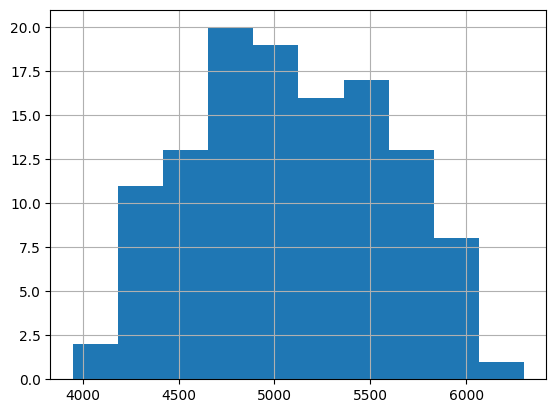

In [24]:
filter_gentoo['body_mass_g'].hist()

In [27]:
lower_limit = mean_gentoo -1 * sd_gentoo
upper_limit = mean_gentoo +1 * sd_gentoo
((penguins['body_mass_g'] >= lower_limit) & (penguins['body_mass_g'] <= upper_limit)).mean()

0.2634730538922156

In [28]:
lower_limit = mean_gentoo -2 * sd_gentoo
upper_limit = mean_gentoo +2 * sd_gentoo
((penguins['body_mass_g'] >= lower_limit) & (penguins['body_mass_g'] <= upper_limit)).mean()

0.47904191616766467

In [29]:
lower_limit = mean_gentoo -3 * sd_gentoo
upper_limit = mean_gentoo +3 * sd_gentoo
((penguins['body_mass_g'] >= lower_limit) & (penguins['body_mass_g'] <= upper_limit)).mean()

0.7395209580838323

In [30]:
penguins['Z_SCORE'] = stats.zscore(penguins['body_mass_g'])
penguins

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Z_SCORE
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,-0.571229
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,-0.509011
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,-1.193405
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,-0.944535
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,-0.695664
...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,0.890886
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,0.797560
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,1.917477
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,1.233083


In [34]:
penguins[(penguins['Z_SCORE'] > 3) | (penguins['Z_SCORE'] < -3)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Z_SCORE


In [ ]:
#There are no outliers for this dataset of gentoo penquins
#Note that in Statistics an "Outlier" is an extremely high or extremely low number in a dataset

In [35]:
#List of Gentoo Penguins within 2 standard deviation from the mean
#Note that in Statistics an "Outlier" is an extremely high or extremely low number in a dataset

penguins[(penguins['Z_SCORE'] > 2) | (penguins['Z_SCORE'] < -2)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Z_SCORE
233,Gentoo,Biscoe,48.4,14.6,213.0,5850.0,MALE,2.041913
235,Gentoo,Biscoe,49.3,15.7,217.0,5850.0,MALE,2.041913
237,Gentoo,Biscoe,49.2,15.2,221.0,6300.0,MALE,2.601872
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,MALE,2.290783
297,Gentoo,Biscoe,51.1,16.3,220.0,6000.0,MALE,2.228566
299,Gentoo,Biscoe,45.2,16.4,223.0,5950.0,MALE,2.166348
331,Gentoo,Biscoe,49.8,15.9,229.0,5950.0,MALE,2.166348
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,MALE,2.041913
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,MALE,2.228566


In [36]:
#List of Gentoo Penguins within 1 standard deviation from the mean
#Note that in Statistics an "Outlier" is an extremely high or extremely low number in a dataset

penguins[(penguins['Z_SCORE'] > 1) | (penguins['Z_SCORE'] < -1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Z_SCORE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,-1.193405
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE,-1.255623
18,Adelie,Torgersen,34.4,18.4,184.0,3325.0,FEMALE,-1.100079
20,Adelie,Biscoe,37.8,18.3,174.0,3400.0,FEMALE,-1.006752
27,Adelie,Biscoe,40.5,17.9,187.0,3200.0,FEMALE,-1.255623
...,...,...,...,...,...,...,...,...
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,MALE,2.041913
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,MALE,2.228566
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,1.917477
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,1.233083
